**Importing necessary packages**

In [31]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns

**Extracting the data**

In [32]:
dataset = pd.read_csv('/content/Live.csv')

In [33]:
X = dataset.iloc[:, 3:12].values

**Feature scaling**

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Elbow Method K- Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

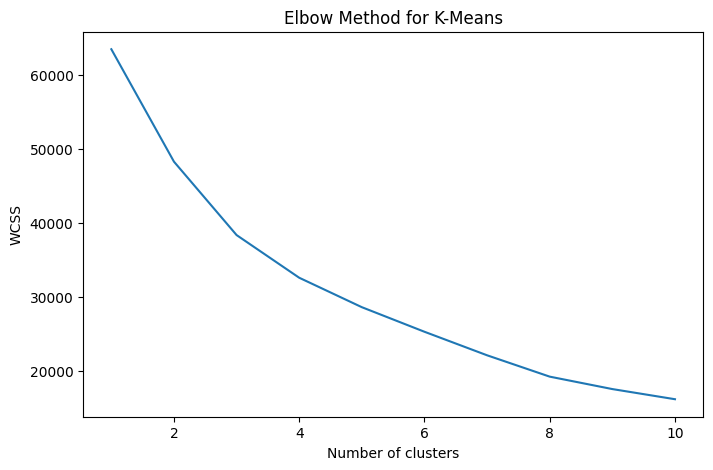

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
optimal_clusters = 3  # You can change this based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter = 300, n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

**Visualisation of selected clusters**

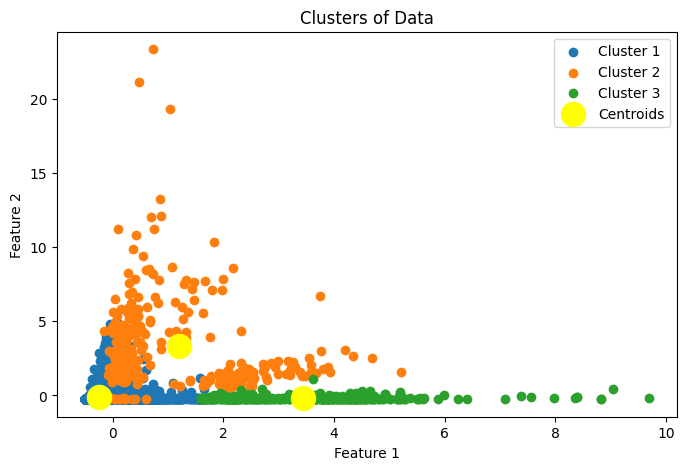

In [42]:
# Visualizing the selected clusters
plt.figure(figsize=(8, 5))
for i in range(optimal_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Evaluation metric**

In [43]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

Silhouette Score for K-Means: 0.7499921477392748


# **Hierarchical Clustering**

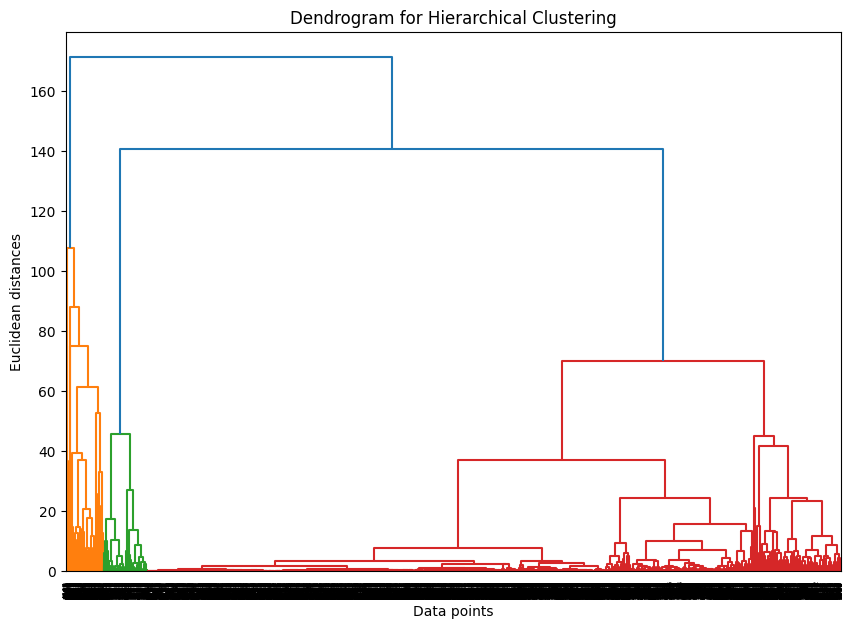

In [44]:
# Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()